# DAND Wrangle And Analyze Data Project

## Table Of Content

<ul>
     <li>
        <a href = '#intro'>Introduction</a>
    </li>
    <li>
        <a href = '#gather'>Gathering</a>
    </li>
    <li>
       <a href = '#assess'> Assessing </a>
    </li>
    <li>
        <a href = '#clean'> Cleaning </a>
    </li>
     <li>
        <a href = '#analysis'> Analysis </a>
    </li>
    <li>
        <a href= '#Refrences'> Refrences </a>
    </li>
</ul>

<a id='intro'></a>
## Introduction

Real-world data rarely comes clean. Using Python and its libraries, I will be gathering data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. I will document my wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "[they're good dogs Brent](http://knowyourmeme.com/memes/theyre-good-dogs-brent)." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs [downloaded their Twitter archive](https://support.twitter.com/articles/20170160) and sent it to Udacity via email exclusively to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

<img src = "https://video.udacity-data.com/topher/2017/October/59dd378f_dog-rates-social/dog-rates-social.jpg" height =200px, width = 400px>
<center>Image via <a href = "http://www.bostonmagazine.com/arts-entertainment/blog/2017/04/18/dog-rates-mit/">Boston Magazine</a></center>


In [4]:
#Importing required libraries libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import json
import requests as rq
import os
import tweepy

<a id = "gather"> </a>

## Gathering

### 1- Twitter Archive

In [5]:
# Reading the csv file and save it to df1 DataFrame and displaying the first five rows
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2- Image prediction file

In [6]:
# Downloading and saving the image prediction module file using the link provided from Udacity
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_prediction = rq.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_prediction.content)

335079

In [7]:
# Showing the data in the image predictions file
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3- Twitter API & JSON

In [8]:
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '###'
consumer_secret = '###'
access_token = '###'
access_secret = '###'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [11]:
# reading information of interest from JSON dictionaries in txt file to a dataframe called df tweet JSON
my_list = []

with open('tweet_json.txt', encoding='utf-8') as js_file:
    for i in js_file:
        data = json.loads(i)
        tweet_id = data['id']
        tweet = data['full_text']
        url1 = tweet[tweet.find('https'):]
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']  
        retweet_status = data['retweet_status'] = data.get('retweet_status', 'Original tweet')
        if retweet_status == 'Original tweet':
            url = url1
        else:
            retweeted_status = 'A retweet'
            url = 'A retweet'
        
    
        my_list.append({'tweet_id': tweet_id,'favorite_count': favorite_count,'retweet_status': retweet_status,
                     'url': url,'retweet_count': retweet_count})

# create a new DataFrame 
df_tweet_json = pd.DataFrame(my_list, columns = ['tweet_id', 'favorite_count','retweet_count', 'retweet_status', 'url'])

<a id = "assess"> </a>
## Assessing

### Visual assessment
Assessing all DataFrames visually

In [8]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
df_tweet_json

,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,34586,7200,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,29976,5408,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,22554,3573,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,37837,7425,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36127,7962,Original tweet,https://t.co/AtUZn91f7f
...,...,...,...,...,...
2323,666049248165822465,92,37,Original tweet,https://t.co/4B7cOc1EDq
2324,666044226329800704,253,118,Original tweet,https://t.co/DWnyCjf2mx
2325,666033412701032449,103,37,Original tweet,https://t.co/y671yMhoiR
2326,666029285002620928,116,40,Original tweet,https://t.co/r7mOb2m0UI


### Programmatic Assessment
Assessing all DataFrames Programmatically using pandas functions

#### Displaying general information about all DataFrames

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2328 non-null   int64 
 1   favorite_count  2328 non-null   int64 
 2   retweet_count   2328 non-null   int64 
 3   retweet_status  2328 non-null   object
 4   url             2328 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.1+ KB


#### Asessing null values

In [19]:
df1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [20]:
df_image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [22]:
df_tweet_json.isnull().sum()

tweet_id          0
favorite_count    0
retweet_count     0
retweet_status    0
url               0
dtype: int64

In [23]:
# General Statisics for twtitter account DataFrame
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
# Displaying unique names entries
df1.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Smiley       1
Yoda         1
Blakely      1
Sandra       1
Coopson      1
Name: name, Length: 957, dtype: int64

In [30]:
df1['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [32]:
df1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [25]:
df1.query("rating_denominator == 0")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [26]:
df1.query("rating_denominator > 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [44]:
df1.query("name == 'a'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [53]:
df1.query("name == 'a'").name.count()

55

In [28]:
# number of unique values in twitter archive
df1.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [60]:
df1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [35]:
# Taking random 6 samples from image prediction DataFrame
df_image_predictions.sample(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1410,770655142660169732,https://pbs.twimg.com/media/CrHqwjWXgAAgJSe.jpg,1,Madagascar_cat,0.494803,False,skunk,0.161184,False,paper_towel,0.091572,False
2027,882268110199369728,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,1,golden_retriever,0.762211,True,Labrador_retriever,0.098985,True,cocker_spaniel,0.017199,True
771,689517482558820352,https://pbs.twimg.com/media/CZGofjJW0AINjN9.jpg,1,Pembroke,0.799319,True,Cardigan,0.189537,True,papillon,0.003386,True
1698,816816676327063552,https://pbs.twimg.com/media/C1XqbhXXUAElpfI.jpg,1,malamute,0.668164,True,Pembroke,0.105033,True,Siberian_husky,0.077875,True
1215,743510151680958465,https://pbs.twimg.com/ext_tw_video_thumb/74350...,1,sea_lion,0.859046,False,tub,0.020405,False,hippopotamus,0.013095,False
1763,826240494070030336,https://pbs.twimg.com/media/C3dlVMbXAAUd-Gh.jpg,1,French_bulldog,0.903048,True,pug,0.096242,True,Boston_bull,0.000234,True


In [36]:
# Displaying radndom statistics about image prediction DataFrame 
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [37]:
df_image_predictions.jpg_url.value_counts()

https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                2
https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg                2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg                2
                                                              ..
https://pbs.twimg.com/media/CoOGZjiWAAEMKGx.jpg                1
https://pbs.twimg.com/media/CUI_kHBWsAAAef5.jpg                1
https://pbs.twimg.com/media/CZLwGAIWQAIYsTx.jpg                1
https://pbs.twimg.com/tweet_video_thumb/CtTFZZfUsAE5hgp.jpg    1
https://pbs.twimg.com/media/CUoFZTyW4AE70iD.jpg                1
Name: jpg_url, Length: 2009, dtype: int64

In [39]:
df_image_predictions.query('jpg_url == "https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1433,773547596996571136,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True
1712,818588835076603904,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True


In [41]:
df_image_predictions.query('jpg_url == "https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [42]:
df_tweet_json.sample(6)

,tweet_id,favorite_count,retweet_count,retweet_status,url
979,747648653817413632,12277,5488,Original tweet,https://t.co/zexdr61Q5M
1509,689905486972461056,2330,649,Original tweet,https://t.co/IE4ZblyZRY
1125,725786712245440512,3949,1284,Original tweet,https://t.co/uIdGqug9rw
2001,671855973984772097,822,391,Original tweet,https://t.co/gpWLdbposg
539,803380650405482500,7554,1812,Original tweet,https://t.co/yPbCALoy2n
30,886258384151887873,25126,5420,Original tweet,https://t.co/xZDA9Qsq1O


In [43]:
df_tweet_json.describe()

,tweet_id,favorite_count,retweet_count
count,2.328000e+03,2328.000000,2328.000000
mean,7.418403e+17,7220.906357,2541.220790
std,6.823143e+16,11216.710362,4302.756388
min,6.660209e+17,0.000000,1.000000
25%,6.781974e+17,1254.750000,512.750000
50%,7.180382e+17,3125.500000,1183.000000
75%,7.986673e+17,8814.000000,2939.750000
max,8.924206e+17,148331.000000,72862.000000


### Quality Issues 


#### `Twitter Archive (df1)` Dataset:
- Change `Timestamp` from string to Datetime format.
- Change `tweet_id` from integer to string format.
- `Source` contains HTML (a href) tag, should be removed, and contain twitter agent only.
- There are dogs named "a" in the data set and should be replaced to None and then changed to NaN.
- Drop all NaN rows in `name` column 
- Drop unnecessary `in_reply_to_status_id`,`in_reply_to_user_id`,`retweeted_status_id`,`retweeted_status_user_id`, `retweeted_status_timestamp` columns
- `Source` data type should be changed to category.
- There are 59 null rows in `expanded_url` and should be dropped.

#### `Image Predictions` Dataset:
- Drop the 66 duplicated `jpg_url`
- Change `tweet_id` from integer to string format.

#### `tweet_JSON` Dataset:
- Change `tweet_id` from integer to string format

### Tidiness Issues 

#### `Twitter Archive (df1)` Dataset:
- Create `rating_ratio` column by dividing `rating_numerator` over `rating_denominator` which makes more sense
- Create column named `type` for each dog type on the Dataset instead of each type having its own column

- Create a master DataFrame that merges all the DataFrames together

<a id = "clean"> </a>
## Cleaning

In [13]:
# Making copies of the orignal dataframes to clean them
df_archives = df1.copy()
df_img = df_image_predictions.copy()
df_json = df_tweet_json.copy()

### Quality Issues 


#### `Twitter Archive (df1)` Dataset:

#### Define
Convert `Timestamp` data type from string to datetime using pandas method (to_datetime)

#### Code

In [14]:
df_archives.timestamp =  pd.to_datetime(df_archives['timestamp'])

#### Test

In [15]:
df_archives.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

#### Define
Convert `tweet_id` data type from int to string using pandas .astype() method

#### Code

In [16]:
df_archives.tweet_id = df_archives.tweet_id.astype(str)

#### Test

In [17]:
df_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Define
Strip HTML tags from `source` and keep twitter agent only, using lamada and apply method

#### Code

In [18]:
import re
df_archives.source = df_archives.source.apply(lambda text: re.sub('<[^<]+?>', '', text))

#### Test

In [19]:
df_archives.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Define
Replacing every dog name with the letter "a" only to None and then to NaN, using pandas replace() method

#### Code

In [20]:
df_archives.name = df_archives.name.str.replace('a', 'None')
df_archives = df_archives.replace('None',np.NaN)

#### Test

In [21]:
#should be zeros
print(df_archives.query('name == "None"').name.count())
print(df_archives.query('name == "a"').name.count())

0
0


#### Define
Drop null columns in `name`, using dropna() method

#### Code

In [22]:
df_archives.dropna(subset = ['name'], inplace=True)

#### Test

In [23]:
#Should be Zero
df_archives.name.isnull().sum()

0

#### Define
Drop unnecessary `in_reply_to_status_id`,`in_reply_to_user_id`,`retweeted_status_id`,`retweeted_status_user_id`, `retweeted_status_timestamp` using pandas drop() method

#### Code

In [24]:
df_archives.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                      'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [25]:
df_archives.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
512,811744202451197953,2016-12-22 01:24:33+00:00,Twitter for iPhone,This is Halo. She likes watermelon. 13/10 http...,https://twitter.com/dog_rates/status/811744202...,13,10,HNonelo,NaN,NaN,NaN,NaN


#### Define
Change `Source` Column to category data type using using astype() method

In [26]:
df_archives.source = df_archives.source.astype('category')

#### Test

In [27]:
df_archives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 2349
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1556 non-null   object             
 1   timestamp           1556 non-null   datetime64[ns, UTC]
 2   source              1556 non-null   category           
 3   text                1556 non-null   object             
 4   expanded_urls       1556 non-null   object             
 5   rating_numerator    1556 non-null   int64              
 6   rating_denominator  1556 non-null   int64              
 7   name                1556 non-null   object             
 8   doggo               53 non-null     object             
 9   floofer             5 non-null      object             
 10  pupper              144 non-null    object             
 11  puppo               20 non-null     object             
dtypes: category(1), datetime64[ns, UTC

#### Define
Drop the 59 null rows in `expanded_url` using dropna() method

#### Code

In [28]:
df_archives.dropna(subset = ['expanded_urls'] , inplace = True)

#### Test

In [29]:
# Should be zero
df_archives.expanded_urls.isnull().sum()

0

#### `Image Predictions` Dataset:

#### Define
Drop the 66 duplicated `jpg_url` using drop_duplicates()

#### Code

In [30]:
df_img.drop_duplicates(subset=['jpg_url'], inplace=True)

#### Test

In [31]:
df_img.jpg_url.duplicated().sum()

0

#### Define
Convert `tweet_id` data type from int to string using pandas .astype() method

#### Code

In [32]:
df_img.tweet_id = df_img.tweet_id.astype(str)

#### Test

In [33]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   object 
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


#### `Tweet JSON` Dataset:

#### Define
Convert `tweet_id` data type from int to string using pandas .astype() method

#### Code

In [34]:
df_json.tweet_id = df_json.tweet_id.astype(str)

#### Test

In [35]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2328 non-null   object
 1   favorite_count  2328 non-null   int64 
 2   retweet_count   2328 non-null   int64 
 3   retweet_status  2328 non-null   object
 4   url             2328 non-null   object
dtypes: int64(2), object(3)
memory usage: 91.1+ KB


### Tideness Issues 


#### `Twitter Archive (df1)` Dataset:

#### Define
Creating `rating_ratio` column by dividing `rating_numerator` by `rating_denominator` and dropping these two columns

#### Code

In [36]:
df_archives['rating_ratio'] = df_archives.rating_numerator / df_archives.rating_denominator
df_archives.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Test

In [37]:
df_archives.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating_ratio
240,846514051647705089,2017-03-28 00:07:32+00:00,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,BNonerney,doggo,NaN,NaN,NaN,1.3


#### Define
Create `type` column for each dog type using extract() method and drop the dogs columns

#### Code

In [38]:
# Merging dog types into one 'type' column.
df_archives['type'] = df_archives.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

# Drop the original columns
df_archives.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

In [39]:
df_archives.type.value_counts()

pupper     145
doggo       50
puppo       24
floofer      2
Name: type, dtype: int64

#### Define
Create a master DataFrame that merges all the DataFrames togther, using merge mrthod

#### Code

In [40]:
df_temp = pd.merge(df_archives, df_json, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')
df_master = pd.merge(df_temp, df_img, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

#### Test

In [41]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1386 entries, 0 to 1385
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1386 non-null   object             
 1   timestamp       1386 non-null   datetime64[ns, UTC]
 2   source          1386 non-null   category           
 3   text            1386 non-null   object             
 4   expanded_urls   1386 non-null   object             
 5   name            1386 non-null   object             
 6   rating_ratio    1386 non-null   float64            
 7   type            189 non-null    object             
 8   favorite_count  1386 non-null   int64              
 9   retweet_count   1386 non-null   int64              
 10  retweet_status  1386 non-null   object             
 11  url             1386 non-null   object             
 12  jpg_url         1386 non-null   object             
 13  img_num         1386 non-null   i

## Saving the Master DataFrame to a csv file

In [42]:
# Saving the master dataframe to a (CSV) file to use it in analysis
df_master.to_csv('twitter-archive-master.csv', index=False)

<a id = "analysis"> </a>
## Analysis

### 1- What is the average rating  ratio of dogs?

In [125]:
avg_rate = df_master.rating_ratio.mean()

print("Dogs average rating ratio: %.2f" % avg_rate)

Dogs average rating ratio: 1.20


### 2-  What is the most used twitter agent ?

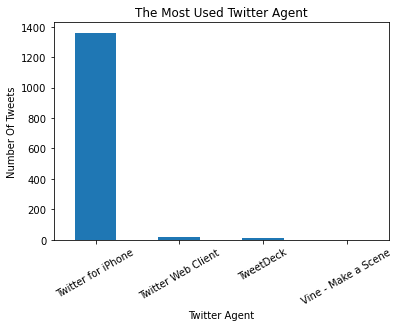

In [134]:
twitter_agent = df_master.source.value_counts()

twitter_agent.plot(kind = 'bar')
plt.xlabel('Twitter Agent')
plt.xticks(rotation=30)
plt.ylabel('Number Of Tweets')
plt.title('The Most Used Twitter Agent');

### Obersvations
>The bar chart showed that most users are using the official Twitter app on IPhone 

### 3- What is the most favorable dog based on the tweet favorites number?

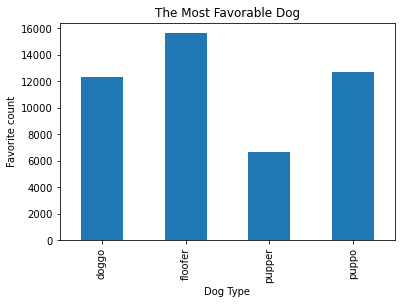

In [111]:
count = df_master.groupby('type').favorite_count.mean()
count.plot(kind='bar')
plt.xlabel('Dog Type');
plt.ylabel('Favorite count')
plt.xticks(rotation='horizontal')
plt.title('The Most Favorable Dog');

### Obersvations
> The bar chart showed that "floofer" dog type is the most loved dog based on all tweets' favorite count

### 4- What are the proportion of image numbers for all tweets?

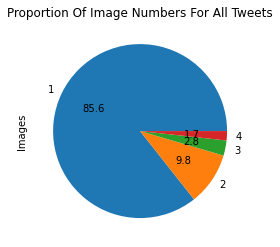

In [46]:
images_proportion = df_master.img_num.value_counts()
images_proportion.plot(kind = 'pie', autopct='%.1f');
plt.ylabel('Images')
plt.title('Proportion Of Image Numbers For All Tweets');

### Obersvations
> The majority of tweets (85.6%) have only 1 picture

<a id = "Refrences"> </a>

## Refrences

- https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
- https://stackoverflow.com/questions/45999415/removing-html-tags-in-pandas
- https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/
- https://stackoverflow.com/questions/1221108/barchart-with-vertical-labels-in-python-matplotlib